# Visualizing Earnings Based On College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.
sing visualizations, we can start to explore questions from the dataset like:

 - Do students in more popular majors make more money?
 - How many majors are predominantly male? Predominantly female?
 - Which category of majors have the most students?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
#recent_grads.iloc[:1]
#recent_grads.describe()
recent_grads.tail(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
163,164,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,...,13862,14460,1487,0.047584,28000,20000,40000,19957,9404,5125
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.968954,342,32551,...,7001,20748,1360,0.040105,28000,21000,35000,23515,7705,2868
165,166,2603,OTHER FOREIGN LANGUAGES,11204.0,3472.0,7732.0,Humanities & Liberal Arts,0.690111,56,7052,...,3685,3214,846,0.107116,27500,22900,38000,2326,3703,1115
166,167,6001,DRAMA AND THEATER ARTS,43249.0,14440.0,28809.0,Arts,0.666119,357,36165,...,15994,16891,3040,0.077541,27000,19200,35000,6994,25313,11068
167,168,3302,COMPOSITION AND RHETORIC,18953.0,7022.0,11931.0,Humanities & Liberal Arts,0.629505,151,15053,...,6612,7832,1340,0.081742,27000,20000,35000,4855,8100,3466
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


Let's drop rows with missing values.

In [3]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()

In [4]:
cleaned_data_count = recent_grads.shape[0]
#cleaned_data_count = raw_data_count
print('raw data(nomber of columns):' + str(raw_data_count))
print('clean data(nomber of columns):' + str(cleaned_data_count))

raw data(nomber of columns):173
clean data(nomber of columns):172


Let's explore some relations between data and later try to analyze them.

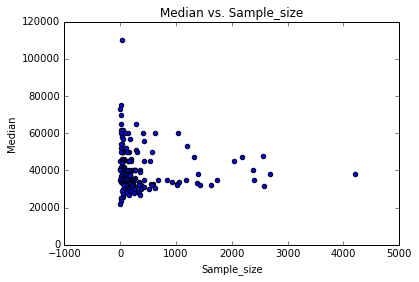

In [7]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size')

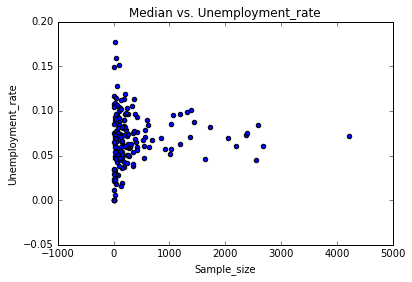

In [8]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Median vs. Unemployment_rate')

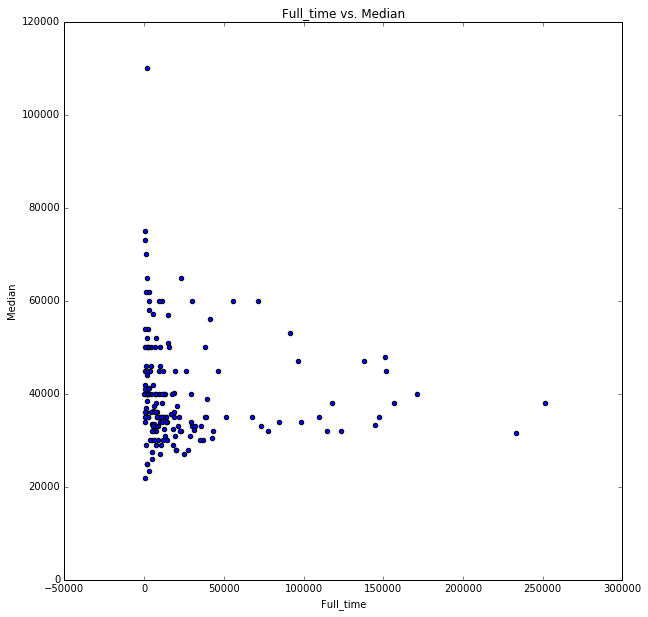

In [22]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full_time vs. Median', figsize=(10,10))

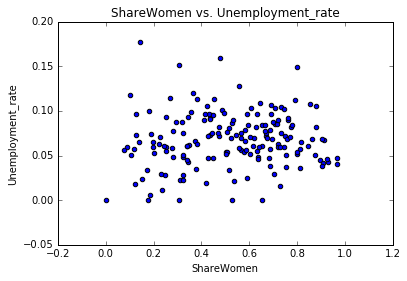

In [10]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='ShareWomen vs. Unemployment_rate')

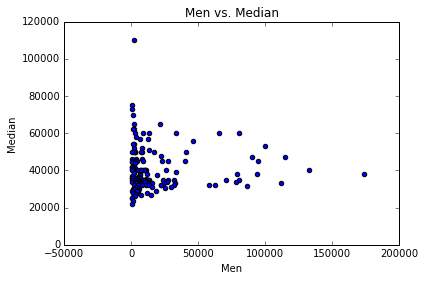

In [11]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs. Median')

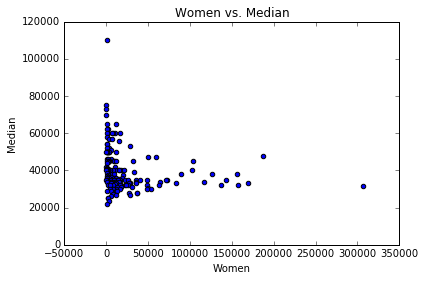

In [16]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs. Median')

Now, let's try to analyze the plots above.
#### Do students that majored in subjects that were majority female make more money?
No, them don't.
#### Is there any link between the number of full-time employees and median salary?
No, it isn't. As we see from the related plot: salary doesn't depend on number of full-time workers.

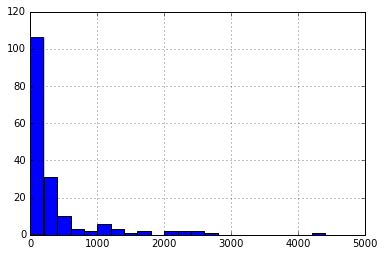

In [23]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

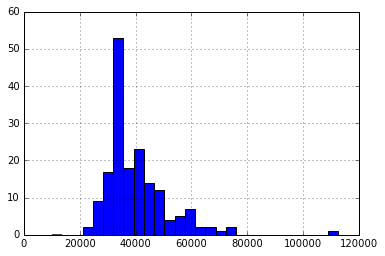

In [62]:
recent_grads['Median'].hist(bins=30, range=(0,120000))

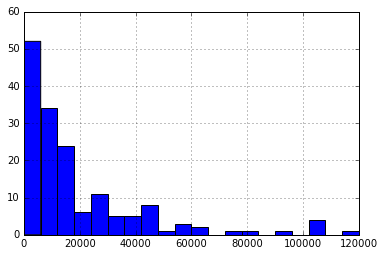

In [36]:
recent_grads['Employed'].hist(bins=20, range=(0,120000))

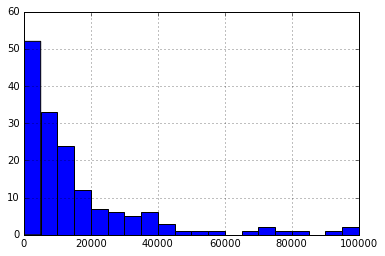

In [38]:
recent_grads['Full_time'].hist(bins=20, range=(0,100000))

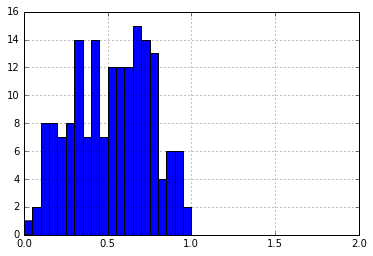

In [47]:
recent_grads['ShareWomen'].hist(bins=40, range=(0,2))

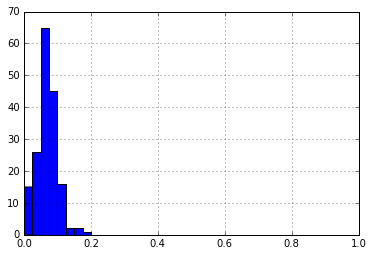

In [52]:
recent_grads['Unemployment_rate'].hist(bins=40, range=(0,1))

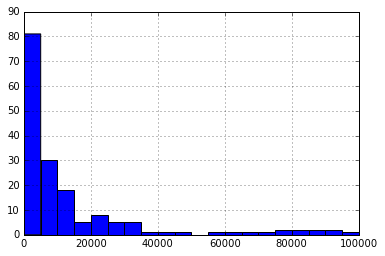

In [57]:
recent_grads['Men'].hist(bins=20, range=(0,100000))

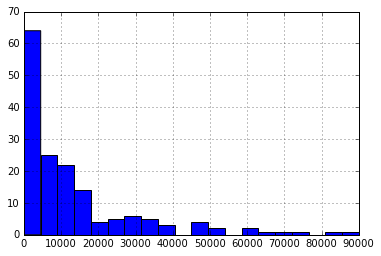

In [60]:
recent_grads['Women'].hist(bins=20, range=(0,90000))

#### What percent of majors are predominantly male? Predominantly female?
?
#### What's the most common median salary range?
From 20,000 to 40,000 $

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed94b2a748>,
      dtype=object)

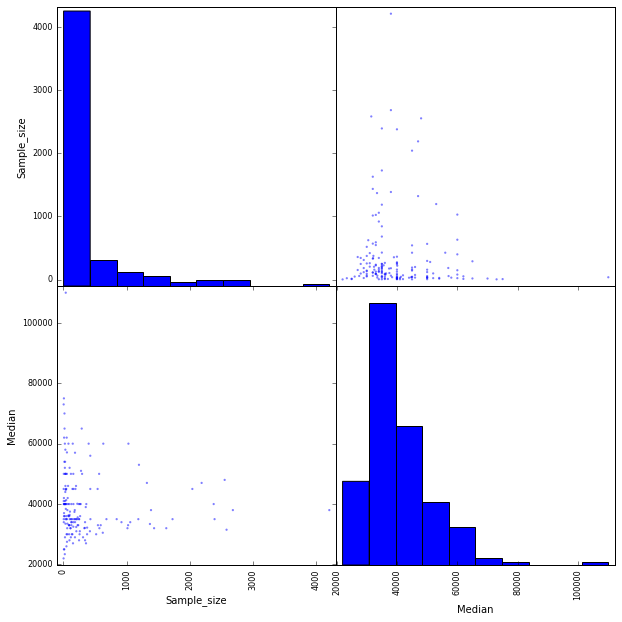

In [64]:
import pandas.plotting as pdpl
pdpl.scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed9495b828>,
      dtype=object)

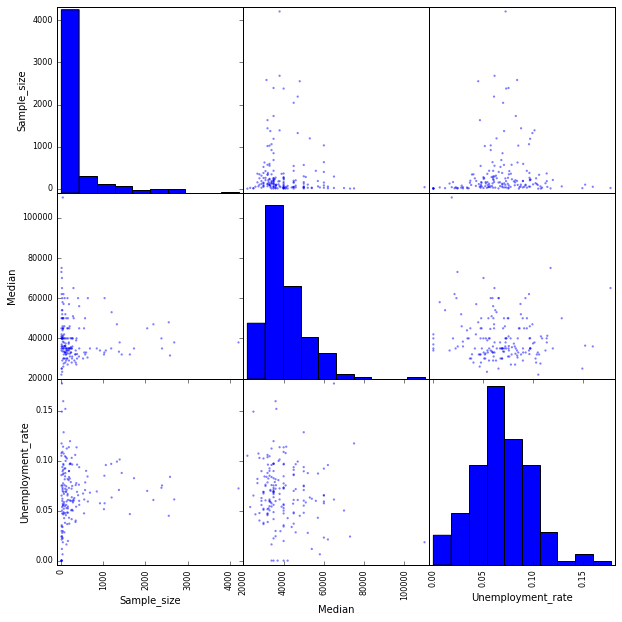

In [67]:
pdpl.scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

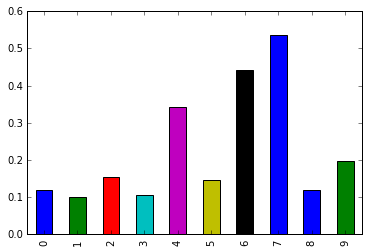

In [68]:
recent_grads.head(10).tail(10)['ShareWomen'].plot(kind='bar')